# CS237 - Spring 2023 - Programming Assignment 02
## Due Wednesday, January 31st at 09:00 p.m. in Gradescope

Submit your programming assignment by filling in this notebook with your solutions. Write all your code in this file, **be sure to click on Runtime-> Run all and verify that everything works as you intended**, and then upload the `ipynb` file to Gradescope.

### Notes:
* You can reuse the code provided in this and previous homework descriptions.
* You are obliged to go to "Runtime->Run All" and execute all cells before downloading the .ipynb file.
* Do your best to follow these principles:
 * **Correctness**: your code should be free of error. Debug it as many times as possible.
 * **Clarity**: write high-quality comments, functions, and variable naming
 * **Simplicity**: write your solution in the assigned cells, don't create new cells or reorder them.
 * **Completeness**: the solution to all problems must be included in one Python notebook, and no function should be blank.
 * **Authenticity**, since we assume that you posted your code written by you.

### Warmup - Generating Random Numbers


Go to https://docs.python.org/2/library/random.html and read about the random library. We will use the following two functions, which you should understand well before proceeding:

In [1]:
# Run this cell by clicking on the play button on the left to load the random library
import random

In the next cell we will use the function randint to generate integers between 1 and 59. To run the code, move the mouse cursor on the top of the cell and click on the play button on the left.

In [2]:
# random.randint(a, b): returns a random integer N such that a <= N <= b.
random.randint(1,59)

48

Next, we will use the funcion random to generate floatin point numbers in the half-closed interval [0.0, 1.0).

In [3]:
import random
# random.random(): return a random floating point number in the range [0.0, 1.0).
random.random()


0.9623935141336623

### Problem 1 - Random Number Permutator

Consider a random machine that randomly shuffles four distinct digits 1, 2, 3, and 4. Assume that every permutation generated by a shuffle has the same probability once you pull the lever.

We need your help to use `random.randint(a,b)` to write a function that will generate 4 distinct random digits for the Random Number Permutator.

Write your own code and use the comments to explain your approach.

In [4]:
def permutator():
  # modify this code to randomly generate four distinct integers

  # generate first number and store it in an array
  first = random.randint(1,4)
  toReturn = [first]

  # move on to the rest
  for i in range(3):
    num = random.randint(1,4)
    while num in toReturn: # check if number is already in the array
      num = random.randint(1,4)
    toReturn.append(num) # append number to array

  return toReturn

Run the code bellow to check if your function produces at least one valid output. It doesn't ensure that your function is right.

In [8]:
# do not change the code bellow
numbers = permutator()
def is_valid(numbers):
  numbers = sorted(numbers)
  for i in range(len(numbers)-1):
    if numbers[i] >= numbers[i+1]:
      return False
  return True

if is_valid(numbers):
  print('Good luck!')
else:
  print('Invalid numbers')

Good luck!


### Problem 2 - Visualization

**Your task: Finish the function `pull_the_lever` below, and run the code to generate the histogram before submitting your .ipynb file to Gradescope.**

Let $A_i$ be the event that the digit $i$ is placed at position $i$. For example, in the permutation 3241, digit 2 is placed at the second position, so the event $A_2$ happened.


In this part, we will use `matplotlib` to plot the results of running the permutator 10000 times and create a histogram with 4 bars that records the following probabilities:
 * $\Pr(A_1 \cup A_2)$
 * $\Pr(A_1)$
 * $\Pr(A_2)$
 * $\Pr(A_1 \cap A_2)$

pull_the_lever must return a list with at least one of the following events:
A1, if the event A1 happened
A2, if the event A2 happened
A1UA2, if event A1 happened, A2 happened, or both A1 and A2 happened
A1_A2, if both events A1 and A2 happened, simultaneously
Neither, if neither one happend


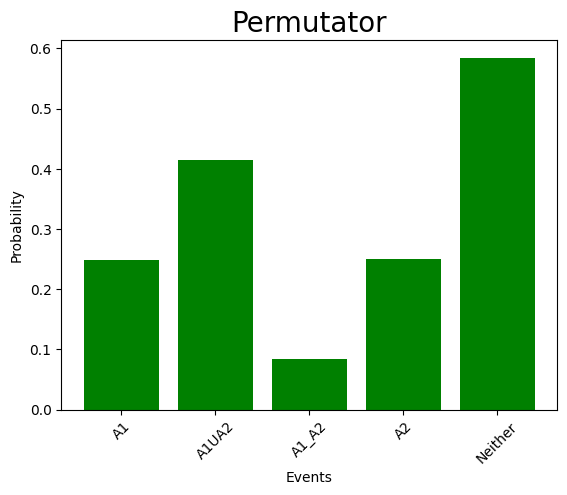

In [11]:
from typing_extensions import final
import matplotlib.pyplot as plt
import random

# Comment out the next 6 print statements
# print("The function pull_the_lever must call the permutator function.")
# print("pull_the_lever must return a list with at least one of the following events:")
# print("A1, if the event A1 happened")
# print("A2, if the event A2 happened")
# print("A1UA2, if event A1 happened, A2 happened, or both A1 and A2 happened")
# print("A1_A2, if both events A1 and A2 happened, simultaneously")
# print("Neither, if neither one happend")
# Finish this function
def pull_the_lever():
  arr = permutator()
  a1 = False
  a2 = False
  toReturn = []

  if (arr[0] == 1):
    a1 = True
    toReturn.append("A1")

  if (arr[1] == 2):
    a2 = True
    toReturn.append("A2")

  if (a1 or a2):
    toReturn.append("A1UA2")

  if (a1 and a2):
    toReturn.append("A1_A2")

  if (not a1 and not a2):
    toReturn.append("Neither")

  return toReturn

def simulator(num_trials = 100000):
    count = {"A1":0,"A2":0,"A1UA2":0,"A1_A2":0,"Neither":0}
    for i in range(num_trials):
      for r in pull_the_lever():
        if r != "neither":
          count[r]+=1

    # empirical probabilities
    for f in count:
      count[f]= count[f]/num_trials

    # plot the probabilities
    x,y = zip(*sorted(zip(count.keys(),count.values())))
    colors = ["g" for i in x]
    plt.bar(x, y, color=colors)
    plt.xlabel("Events")
    plt.ylabel("Probability")
    plt.xticks(rotation=45)
    plt.title("Permutator",fontsize=20)
    plt.show()

simulator()